In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, lasso_path
from sklearn.metrics import r2_score
import patsy
from sklearn.preprocessing import StandardScaler

In [49]:
df = pd.read_excel("C:/Users/Matias/OneDrive/Documentos/jupyter/CausalAI-Course/data/Districtwise_literacy_rates.xlsx")
df.head()

,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,CLS5,CLS6,CLS7,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7
0,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564.0,11.33,197001.90,...,23,852,239,2708,5205,43,70,28,1065,638
1,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503.0,17.19,161871.18,...,30,1665,360,2937,5873,236,60,105,2533,964
2,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751.0,98.73,155798.45,...,0,2873,40,828,3647,1159,14,0,4757,129
3,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753.0,11.74,150755.79,...,8,1035,325,1878,3892,250,68,19,1493,716
4,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060.0,13.80,97651.28,...,5,1101,209,1336,2682,113,90,38,1414,506


In [50]:
df.shape

(680, 100)

In [51]:
df = df.dropna().reset_index(drop=True)

In [52]:
df.shape

(625, 100)

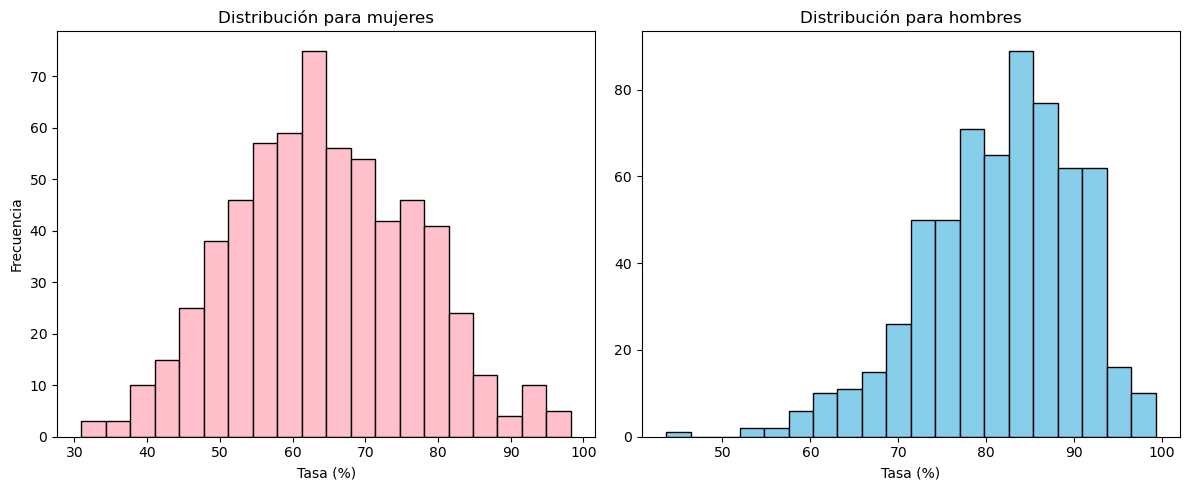

In [24]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df["FEMALE_LIT"], bins=20, color="pink", edgecolor="black")
plt.title("Distribución para mujeres")
plt.xlabel("Tasa (%)")
plt.ylabel("Frecuencia")

plt.subplot(1,2,2)
plt.hist(df["MALE_LIT"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución para hombres")
plt.xlabel("Tasa (%)")

plt.tight_layout()
plt.show()

In [26]:
y = df["FEMALE_LIT"]

In [89]:
print("Para modelo low debemos usar pocas pero explicativas")

X_modelo_low = df[["MALE_LIT", "SEXRATIO", "P_URB_POP", "GROWTHRATE"]]
#X_modelo_low = df[["P_URB_POP", "SEXRATIO", "TOTPOPULAT", "SCHTOT", "OVERALL_LI"]]
X_modelo_train, X_modelo_test, y_modelo_train, y_modelo_test = train_test_split(X_modelo_low, y, test_size=0.3, random_state=123)

modelo_low = LinearRegression()
modelo_low.fit(X_modelo_train, y_modelo_train)

y_pred_train = modelo_low.predict(X_modelo_train)
y_pred_test = modelo_low.predict(X_modelo_test)

Para modelo low debemos usar pocas pero explicativas


In [90]:
print("Modelo low de train:", r2_score(y_modelo_train, y_pred_train))
print("Modelo high de test:", r2_score(y_modelo_test, y_pred_test))

Modelo low de train: 0.7675817888520174
Modelo high de test: 0.7989459568291432


In [37]:
print("Opción 2")

X_modelo_low = df[["MALE_LIT", "SCHTOT", "SCHTOT", "P_SC_POP"]]
X_modelo_train, X_modelo_test, y_modelo_train, y_modelo_test = train_test_split(X_modelo_low, y, test_size=0.3, random_state=123)

modelo_low = LinearRegression()
modelo_low.fit(X_modelo_train, y_modelo_train)

y_pred_train = modelo_low.predict(X_modelo_train)
y_pred_test = modelo_low.predict(X_modelo_test)

print("Modelo low de train:", r2_score(y_modelo_train, y_pred_train))
print("Modelo low de test:", r2_score(y_modelo_test, y_pred_test))

Modelo low de train: 0.7563657571413333
Modelo low de test: 0.7879417225196769


In [39]:
formula = "FEMALE_LIT ~ (MALE_LIT + SEXRATIO + P_URB_POP + GROWTHRATE + TOTPOPULAT)**2 + I(MALE_LIT**2) + I(SEXRATIO**2) + I(P_URB_POP**2)"

In [40]:
y_modelo_high, X_modelo_high = patsy.dmatrices(formula, df, return_type="dataframe")

X_modelo_high_train, X_modelo_high_test, y_modelo_high_train, y_modelo_high_test = train_test_split(X_modelo_high, y_modelo_high, test_size=0.3, random_state=123)

modelo_high = LinearRegression()
modelo_high.fit(X_modelo_high_train, y_modelo_high_train)

y_high_pred_train = modelo_high.predict(X_modelo_high_train)
y_high_pred_test = modelo_high.predict(X_modelo_high_test)

In [41]:
print("Modelo high de train:", r2_score(y_modelo_high_train, y_high_pred_train))
print("Modelo high de test:", r2_score(y_modelo_high_test, y_high_pred_test))

Modelo high de train: 0.801620229707998
Modelo high de test: 0.8142666439985644


In [54]:
formula = (
    "FEMALE_LIT ~ (MALE_LIT + SEXRATIO + P_URB_POP + GROWTHRATE + TOTPOPULAT)**2 + "
    "I(MALE_LIT**2) + I(SEXRATIO**2) + I(P_URB_POP**2)")

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import Lasso

In [60]:
y_design, X_design = patsy.dmatrices(formula, df, return_type="dataframe")

X_design.head()

,Intercept,MALE_LIT,SEXRATIO,P_URB_POP,GROWTHRATE,TOTPOPULAT,MALE_LIT:SEXRATIO,MALE_LIT:P_URB_POP,MALE_LIT:GROWTHRATE,MALE_LIT:TOTPOPULAT,SEXRATIO:P_URB_POP,SEXRATIO:GROWTHRATE,SEXRATIO:TOTPOPULAT,P_URB_POP:GROWTHRATE,P_URB_POP:TOTPOPULAT,GROWTHRATE:TOTPOPULAT,I(MALE_LIT ** 2),I(SEXRATIO ** 2),I(P_URB_POP ** 2)
0,1.0,77.10,843.0,11.33,34.62,875564.0,64995.30,873.5430,2669.2020,67505984.40,9551.19,29184.66,7.381005e+08,392.2446,9.920140e+06,30312025.68,5944.4100,710649.0,128.3689
1,1.0,77.35,873.0,17.19,20.34,1015503.0,67526.55,1329.6465,1573.2990,78549157.05,15006.87,17756.82,8.865341e+08,349.6446,1.745650e+07,20655331.02,5983.0225,762129.0,295.4961
2,1.0,77.95,879.0,98.73,23.56,1269751.0,68518.05,7696.0035,1836.5020,98977090.45,86783.67,20709.24,1.116111e+09,2326.0788,1.253625e+08,29915333.56,6076.2025,772641.0,9747.6129
3,1.0,68.56,883.0,11.74,21.18,735753.0,60538.48,804.8944,1452.1008,50443225.68,10366.42,18701.94,6.496699e+08,248.6532,8.637740e+06,15583248.54,4700.4736,779689.0,137.8276
4,1.0,75.41,913.0,13.80,29.18,570060.0,68849.33,1040.6580,2200.4638,42988224.60,12599.40,26641.34,5.204648e+08,402.6840,7.866828e+06,16634350.80,5686.6681,833569.0,190.4400


In [61]:
X_design = X_design.loc[:, X_design.var(axis=0) > 0]

In [65]:
scaler = StandardScaler() 
Xs = scaler.fit_transform(X_design)

In [68]:
y = y_design.iloc[:, 0].values  
X = X_design.values 

In [77]:
lambdas = np.logspace(-3, 4, 100)

In [81]:
print("No convergía, por eso lo estandaricé")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

No convergía, por eso lo estandaricé


In [83]:
nonzero_counts = []

for alpha in lambdas:
    model = Lasso(alpha=alpha, max_iter=20000, tol=0.01)
    model.fit(X_scaled, y)
    nonzero_counts.append(np.sum(model.coef_ != 0))

print("Sigue sin converger, tuve que darle un max de iteraciones")

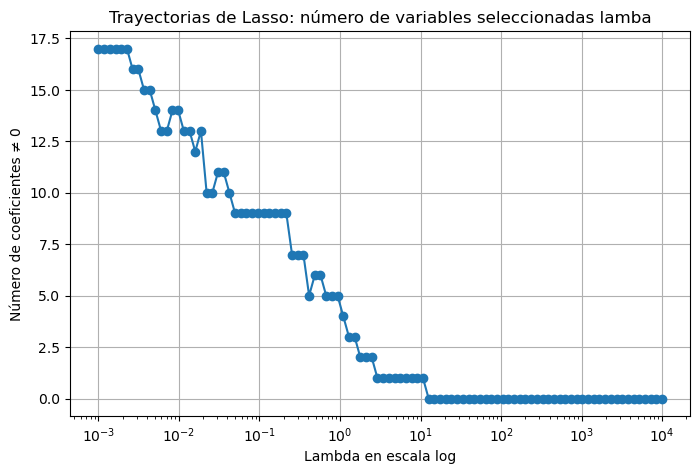

In [84]:
plt.figure(figsize=(8,5))
plt.plot(lambdas, nonzero_counts, marker="o")
plt.xscale("log")
plt.xlabel("Lambda en escala log")
plt.ylabel("Número de coeficientes ≠ 0")
plt.title("Trayectorias de Lasso: número de variables seleccionadas lamba")
plt.grid(True)
plt.show()